In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Correlation with happiness score
 Happiness Score                      1.000000
Log GDP per capita                   0.781406
Social support                       0.734687
Healthy life expectancy at birth     0.751363
Freedom to make life choices         0.550602
Generosity                           0.144121
Perceptions of corruption           -0.449573
Positive affect                      0.496110
Negative affect                     -0.422817
Confidence in national government   -0.078725
Freedom_Rating                       0.537582
Life Expectancy                      0.752110
GDP                                  0.193531
Name: Happiness Score, dtype: float64 




Text(0, 0.5, 'Feature')

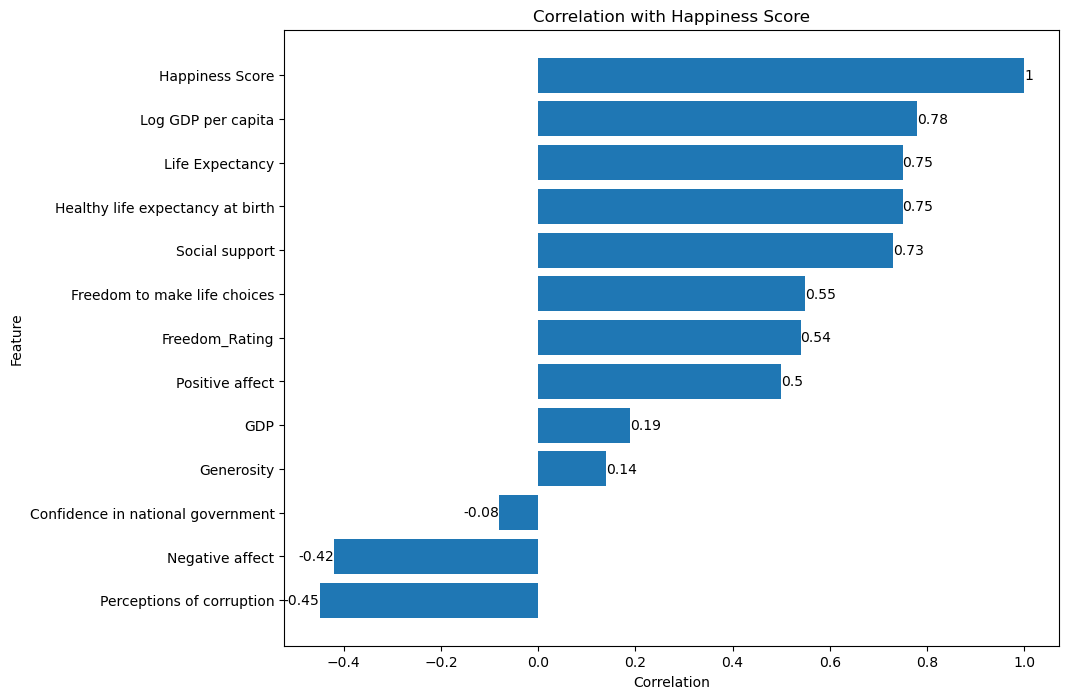

In [47]:
# import data
df = pd.read_csv("all_data.csv")

corr_df = df.copy()
corr_df = corr_df.drop(['Unnamed: 0', "Year", "Country"], axis=1)

# run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
corr = corr_df.corr()

print("Correlation with happiness score\n", corr["Happiness Score"], "\n\n")

corr_sorted = corr["Happiness Score"].sort_values(ascending=True)

bars = plt.barh(corr_sorted.index, corr_sorted.round(2))
plt.title("Correlation with Happiness Score")
plt.bar_label(bars)
plt.xlabel('Correlation')
plt.ylabel('Feature')

#### Notes
- Interesting to see the low correlation on a high level between confidence in national government and happiness scores. Would be interesting to investigate this at the extremes, maybe it only affects under a certain average and will need more investigation. <br>
- Interesting to see a low correlation between GDP and Happiness Score but a high Correlation between log GPD per Capite. GDP represents the total value of goods and services whereas GDP per Capita represents the economic output per person. 

/var/folders/lk/9mqmq18n1tl6kvv525hcc1yc0000gn/T/ipykernel_41793/1813613734.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),


[Text(0.5, 1.0, 'Cross Correlation Matrix')]

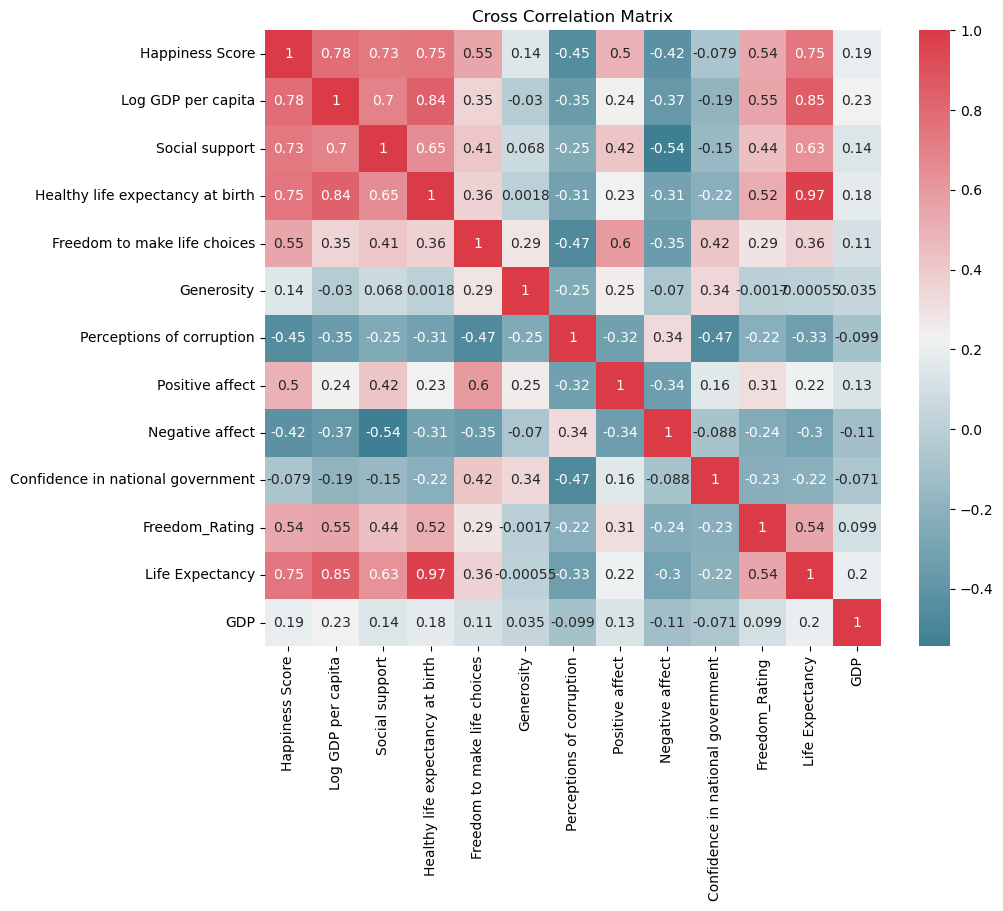

In [46]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True).set(title="Cross Correlation Matrix")

#### Notes

- I can see a high correlation between "Healthy Life Expectancy at Birth" and "Life Expectancy". We probably don't need both of these vairables so lets investigate the difference now.

RangeIndex(start=0, stop=1178, step=1)


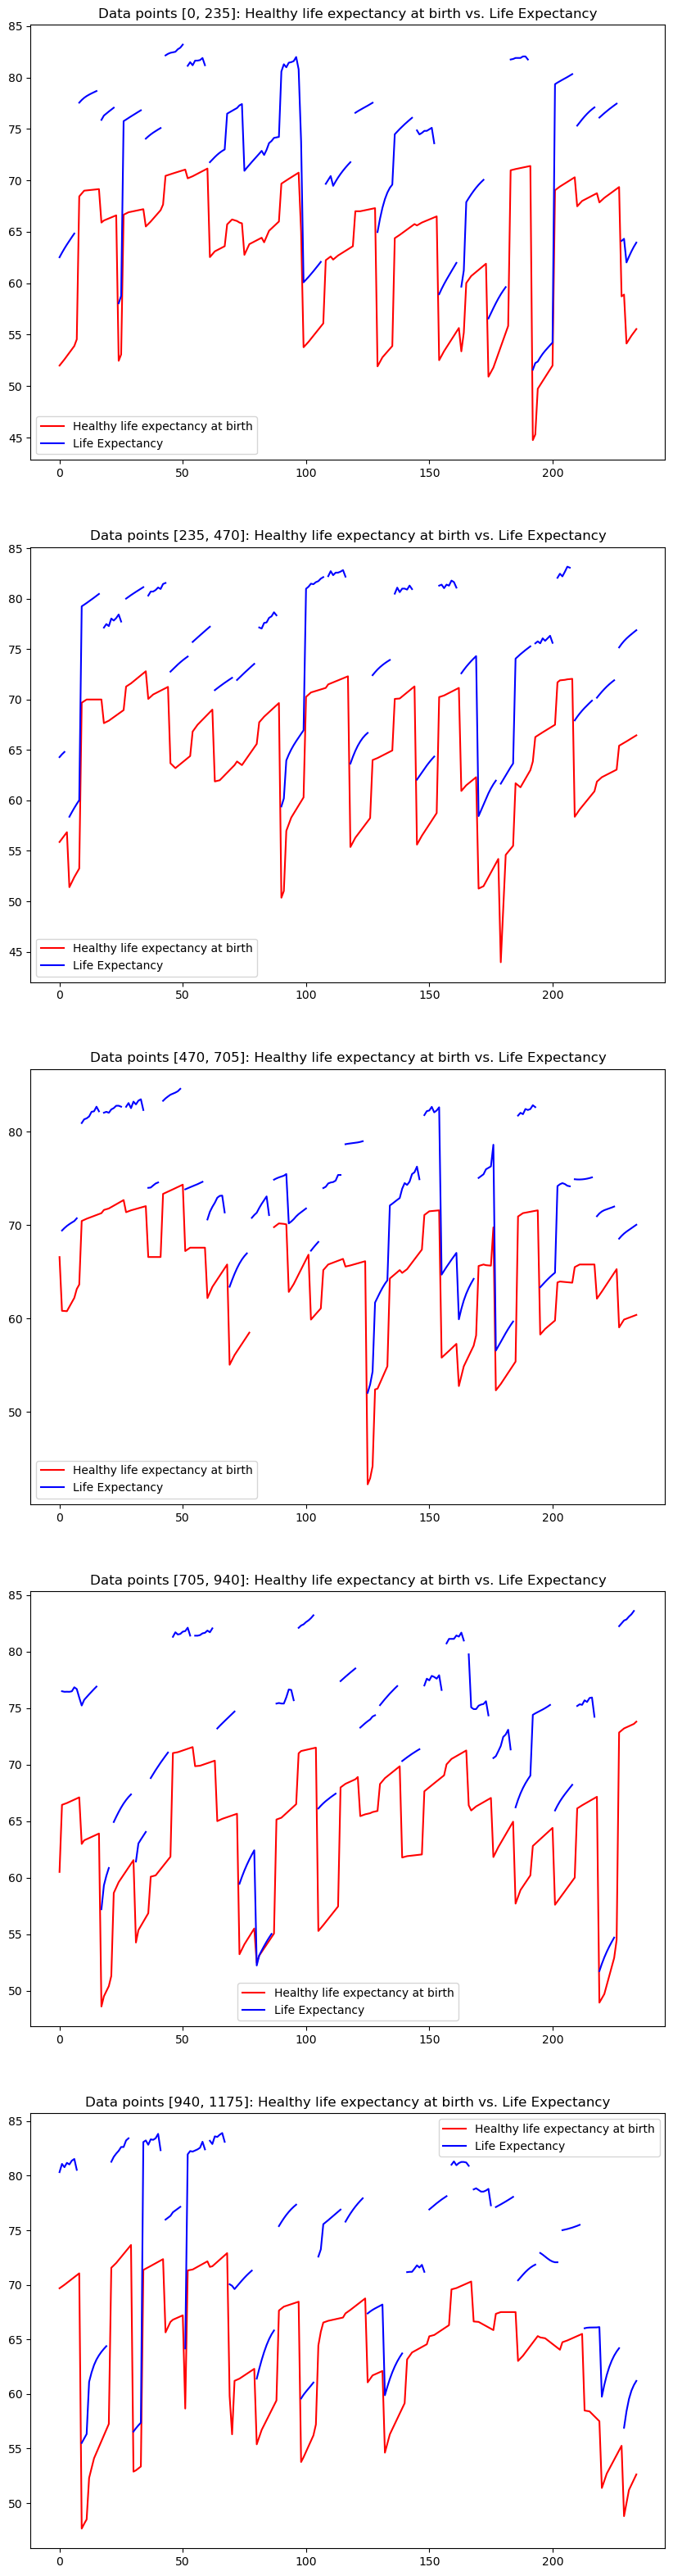

In [78]:
# We have a lot of countries so I am going to pick at random 10.
countries = df["Country"].unique()
rand_countries = countries[np.random.randint(0, len(countries), size=10)]



life_df_healthy = df[["Healthy life expectancy at birth"]]
life_df = df[["Life Expectancy"]]

f, ax = plt.subplots(5, figsize=(10, 40))
for i in range(5):
    country = rand_countries[i]
    df_country = df[df["Country"] == country]
    ax[i].plot(np.arange(235), df["Healthy life expectancy at birth"][i*235:(i+1)*235], color="red", label="Healthy life expectancy at birth")
    ax[i].plot(np.arange(235), df["Life Expectancy"][i*235:(i+1)*235], color="blue", label="Life Expectancy")
    ax[i].set_title(f"Data points [{i*235}, {(i+1)*235}]: Healthy life expectancy at birth vs. Life Expectancy")
    ax[i].legend()
    
    #ax[i].plot()
#xrange = np.arange(0, len(life_df.index))
#plt.plot(xrange, life_df["Healthy life expectancy at birth"], color="red")
#plt.plot(xrange, life_df["Life Expectancy"], color="blue")
#life_df["Healthy life expectancy at birth"]

#### In Summary "Life Expectancy" vs "Healthy Life Expectancy at Birth"
- Since it appears to be more complete I vote we use "Life Expectancy" but I guess we could cross reference this wiht another dataset to check validity.